In [1]:
from map_manager.map_generator import map
from map_manager.noise import toddler

/Users/cetiners/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
nw = map()

nw.populate_map(n_locations=1024, name="terrain",relaxed=True,k=100)
nw.populate_map(n_locations=1024, name="civilisation",relaxed=True,k=100)
nw.populate_map(n_locations=1024, name="threat",relaxed=True, k=100)
nw.populate_map(n_locations=1024, name="faction",relaxed=True, k=100)

nw.attribute_view(seed_1=20,seed_2=30,map_name="terrain",view_name="terrain")
nw.attribute_view(seed_1=40,seed_2=50,map_name="civilisation",view_name="civilisation")
nw.attribute_view(seed_1=34,seed_2=34,map_name="threat",view_name="threat",double=False)
nw.attribute_view(seed_1=67,seed_2=89,map_name="faction",view_name="faction",double=True)

/Users/cetiners/Desktop/Thesis/human_error/map_manager/map_attributer.py:82: RuntimeWarning: invalid value encountered in true_divide
  average = sum_/count


array([[4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 1., 1., 1.],
       ...,
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.]])

Text(0.5, 1.0, 'Factions')

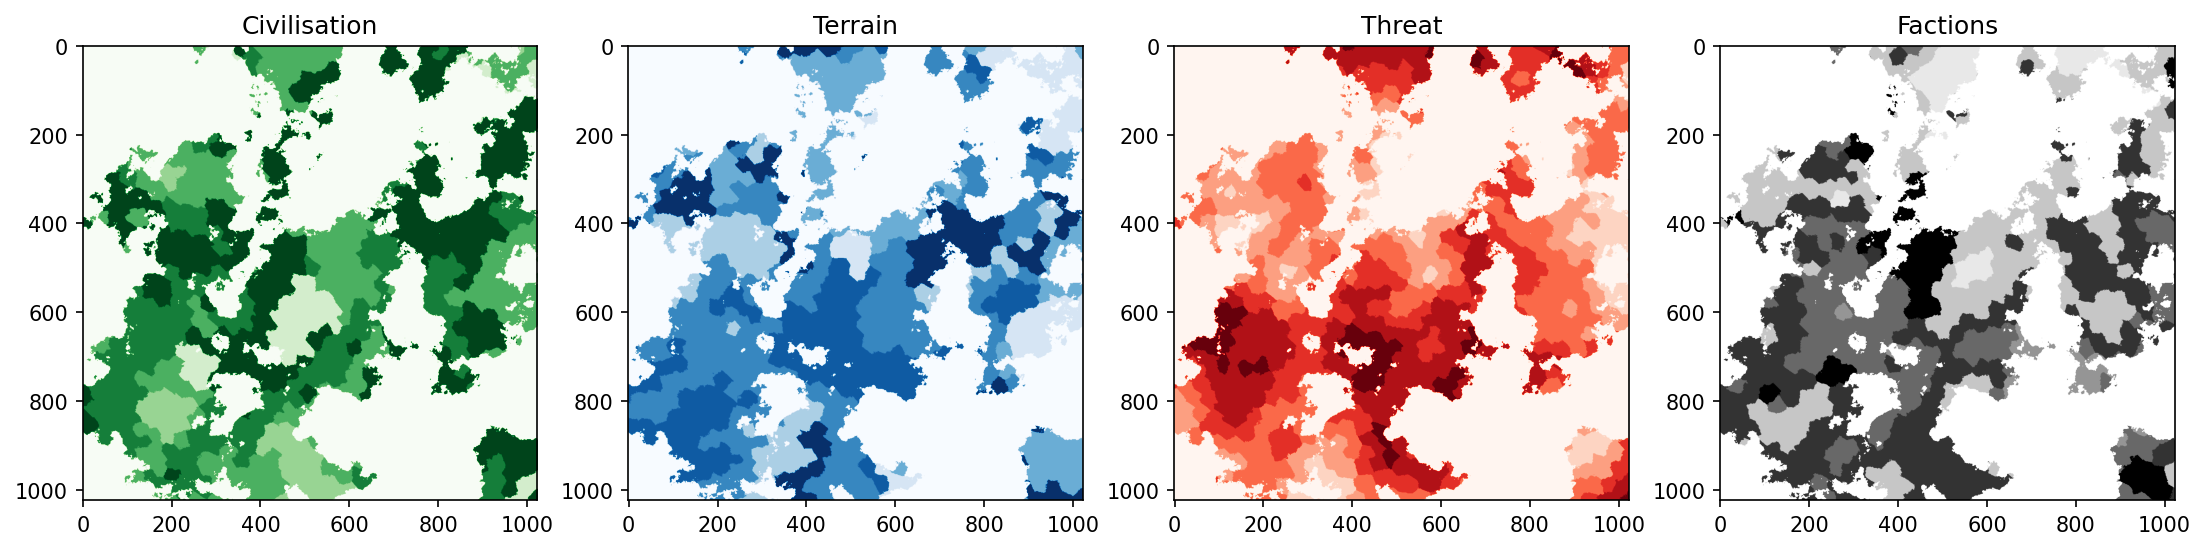

In [3]:

civ = nw.views["civilisation"].copy()
ter = nw.views["terrain"].copy()
thr = nw.views["threat"].copy()
fac = nw.views["faction"].copy()

for i in range(1024):
    for j in range(1024):
        civ[i,j] += 1
        ter[i,j] += 1
        thr[i,j] += 1
        fac[i,j] += 1

import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(1,4)
fig.set_dpi(150)
fig.set_size_inches(18, 6)

import random
seed=random.randint(1,100)
res=2
octaves = 15
persistence = 0.60
lacunarity = 2
mask = toddler(size=1024, seed=seed,res=res, octaves = octaves, persistence = persistence, lacunarity = lacunarity,mask=True)

ax[0].imshow(civ*(np.invert(mask)),cmap="Greens")
ax[0].set_title("Civilisation")

ax[1].imshow(ter*(np.invert(mask)),cmap="Blues")
ax[1].set_title("Terrain")

ax[2].imshow(thr*(np.invert(mask)),cmap="Reds")
ax[2].set_title("Threat")

ax[3].imshow(fac*(np.invert(mask)),cmap="Greys")
ax[3].set_title("Factions")

In [5]:

view_noises = {
    "terrain" : { 
        "atr" :{
            "tundra"            : [[0,0]] ,
            "rainforest"        : [[2,2]] ,
            "desert"            : [[0,2],[0,1]] ,
            "grassland"         : [[1,1],[2,1]],
            "mountain"          : [[1,0],[2,0]] ,
            "forest"            : [[1,2]]
            },
        "interval" : 3,
        "atr_names": ["rain","heat"],
        "atr_list" : ["tundra","rainforest","desert","grassland","mountain","forest"]
    },
    "civilisation" : { 
        "atr" :{
            "ruins"         : [[0,2]],   
            "metropol"      : [[2,2]],       
            "city"          : [[2,1],[1,2],[2,0]],       
            "town"          : [[1,1]],      
            "wild"          : [[0,0],[0,1],[1,0]],           
            },
        "interval" : 3,
        "atr_names": ["population","history"],
        "atr_list" : ["ruins","metropol","city","town","wild"]
    },
    "threat" : { 
        "atr" :{
            "very_high" : [[5,5]],   
            "high"      : [[4,4]],       
            "medium"    : [[3,3]],       
            "low"       : [[2,2]],   
            "very_low"  : [[1,1]],       
            "safe"      : [[0,0]],           
            },
        "interval" : 6,
        "atr_names": ["threat","threat"],
        "atr_list" : ["very_high","high","medium","low","very_low","safe"]
    },
    "faction" : { 
        "atr" :{
            "fac1_main"      :  [[2,0]],   
            "fac1_ext"       :  [[2,1],[1,0]],       
            "fac2_main"      :  [[0,2]],       
            "fac2_ext"       :  [[1,2],[0,1]],
            "warzone"        :  [[1,1],[2,2]],
            "undisputed"     :  [[0,0]]
            },
        "interval" : 3,
        "atr_names": ["fac1","fac2"],
        "atr_list" : ["fac1_main","fac1_ext","fac2_main","fac2_ext","warzone","undisputed"]

    }
}

In [5]:
from genetic_algorithm.animals import *

a = herd(map=nw,type="camel")

sum(a.pack_fitness)

-39000

In [4]:
sum(a.pack_fitness)

-35000